<a href="https://colab.research.google.com/github/peacemakafui/Msc-Advanced-Computation-midsem-project/blob/main/Health_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
health_data = '/content/health_data/human_vital_signs_dataset_2024.csv'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
data = pd.read_csv(health_data)

# Display the first few rows of the dataset
print("Sample Data:")
print(data.head())

Sample Data:
   Patient ID  Heart Rate  Respiratory Rate                   Timestamp  \
0           1          60                12  2024-07-19 21:53:45.729841   
1           2          63                18  2024-07-19 21:52:45.729841   
2           3          63                15  2024-07-19 21:51:45.729841   
3           4          99                16  2024-07-19 21:50:45.729841   
4           5          69                16  2024-07-19 21:49:45.729841   

   Body Temperature  Oxygen Saturation  Systolic Blood Pressure  \
0         36.861707          95.702046                      124   
1         36.511633          96.689413                      126   
2         37.052049          98.508265                      131   
3         36.654748          95.011801                      118   
4         36.975098          98.623792                      138   

   Diastolic Blood Pressure  Age  Gender  Weight (kg)  Height (m)  \
0                        86   37  Female    91.541618    1.67935

In [13]:
import pandas as pd

# Assuming you've already loaded the dataset:
# data = pd.read_csv('human_vital_signs_dataset_2024.csv')

# Get the column names
column_names = data.columns.tolist()

# Print the column names
print("Patient Vitals in the dataset:")
print(column_names)

Patient Vitals in the dataset:
['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp', 'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP', 'Risk Category']


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset acquired from kaggle
data = pd.read_csv(health_data)

#synthesize data for proof of concept
# np.random.seed(42)
# dates = pd.date_range(start='2024-01-01', end='2024-01-31', freq='H')
# data = {
#     'Timestamp': dates,
#     'patient_id': np.random.randint(1, 100, size=len(dates)),
#     'age': np.random.randint(20, 80, size=len(dates)),
#     'Systolic Blood Pressure': np.random.normal(120, 15, size=len(dates)),
#     'Diastolic Blood Pressure': np.random.normal(80, 10, size=len(dates)),
#     'Heart Rate': np.random.normal(75, 12, size=len(dates)),
#     'Body Temperature': np.random.normal(36.6, 0.5, size=len(dates)),
#     'Respiratory Rate': np.random.normal(16, 3, size=len(dates)),
#     'Oxygen Saturation': np.random.normal(98,2.29, size=len(dates))
# }

# data = pd.DataFrame(data)

# Display the first few rows of the dataset
# print("Sample Data:")
# print(data.head())

# Calculate statistical summaries
statistics = {
    'Respiratory Rate': {
        'Mean': data['Respiratory Rate'].mean(),
        'Median': data['Respiratory Rate'].median(),
        'Std Dev': data['Respiratory Rate'].std(),
        'Range': (data['Respiratory Rate'].min(), data['Respiratory Rate'].max())
    },
    'Body Temperature': {
        'Mean': data['Body Temperature'].mean(),
        'Median': data['Body Temperature'].median(),
        'Std Dev': data['Body Temperature'].std(),
        'Range': (data['Body Temperature'].min(), data['Body Temperature'].max())
    },
    'Oxygen Saturation': {
        'Mean': data['Oxygen Saturation'].mean(),
        'Median': data['Oxygen Saturation'].median(),
        'Std Dev': data['Oxygen Saturation'].std(),
        'Range': (data['Oxygen Saturation'].min(), data['Oxygen Saturation'].max())
    },
    'Systolic Blood Pressure': {
        'Mean': data['Systolic Blood Pressure'].mean(),
        'Median': data['Systolic Blood Pressure'].median(),
        'Std Dev': data['Systolic Blood Pressure'].std(),
        'Range': (data['Systolic Blood Pressure'].min(), data['Systolic Blood Pressure'].max())
    },
    'Diastolic Blood Pressure': {
        'Mean': data['Diastolic Blood Pressure'].mean(),
        'Median': data['Diastolic Blood Pressure'].median(),
        'Std Dev': data['Diastolic Blood Pressure'].std(),
        'Range': (data['Diastolic Blood Pressure'].min(), data['Diastolic Blood Pressure'].max())
    },
    'Heart Rate': {
        'Mean': data['Heart Rate'].mean(),
        'Median': data['Heart Rate'].median(),
        'Std Dev': data['Heart Rate'].std(),
        'Range': (data['Heart Rate'].min(), data['Heart Rate'].max())
    }
}

# Identify abnormal readings
# Normal ranges: Systolic (90-120), Diastolic (60-80), Heart Rate (60-100),
# Normal ranges: Respiratory Rate (12-18), Body Temperature (°C) (36.1-37.2)
# Normal ranges: Oxygen Saturation (%) (95-100)
abnormal_hr_low = data[(data['Heart Rate'] < 60)]
abnormal_hr_high = data[(data['Heart Rate'] > 100)]

abnormal_systolic_low = data[(data['Systolic Blood Pressure'] < 90)]
abnormal_systolic_high = data[(data['Systolic Blood Pressure'] > 120)]

abnormal_diastolic_low = data[(data['Diastolic Blood Pressure'] < 60)]
abnormal_diastolic_high = data[(data['Diastolic Blood Pressure'] > 80)]

abnormal_temp_low = data[(data['Body Temperature'] < 36.5)]
abnormal_temp_high = data[(data['Body Temperature'] > 37.3)]

abnormal_resp_low = data[(data['Respiratory Rate'] < 12)]
abnormal_resp_high = data[(data['Respiratory Rate'] > 18)]

abnormal_oxygen_low = data[(data['Oxygen Saturation'] < 95)]
abnormal_oxygen_high = data[(data['Oxygen Saturation'] > 100)]

# Calculate range of abnormal readings
abnormal_ranges = {
    'Heart Rate': {
        'Low': (abnormal_hr_low['Heart Rate'].min(), abnormal_hr_low['Heart Rate'].max()),
        'High': (abnormal_hr_high['Heart Rate'].min(), abnormal_hr_high['Heart Rate'].max())
    },
    'Systolic Blood Pressure':{
        'Low': (abnormal_systolic_low['Systolic Blood Pressure'].min(), abnormal_systolic_low['Systolic Blood Pressure'].max()),
        'High': (abnormal_systolic_high['Systolic Blood Pressure'].min(), abnormal_systolic_high['Systolic Blood Pressure'].max())
    },

    'Diastolic Blood Pressure':{
        'Low': (abnormal_diastolic_low['Diastolic Blood Pressure'].min(), abnormal_diastolic_low['Diastolic Blood Pressure'].max()),
        'High': (abnormal_diastolic_high['Diastolic Blood Pressure'].min(), abnormal_diastolic_high['Diastolic Blood Pressure'].max())
    },
    'Body Temperature':{
        'Low': (abnormal_temp_low['Body Temperature'].min(), abnormal_temp_low['Body Temperature'].max()),
        'High': (abnormal_temp_high['Body Temperature'].min(), abnormal_temp_high['Body Temperature'].max())
    },
    'Respiratory Rate':{
        'Low': (abnormal_resp_low['Respiratory Rate'].min(), abnormal_resp_low['Respiratory Rate'].max()),
        'High': (abnormal_resp_high['Respiratory Rate'].min(), abnormal_resp_high['Respiratory Rate'].max())
    },
    'Oxygen Saturation' :{
        'Low': (abnormal_oxygen_low['Oxygen Saturation'].min(), abnormal_oxygen_low['Oxygen Saturation'].max()),
        'High': (abnormal_oxygen_high['Oxygen Saturation'].min(), abnormal_oxygen_high['Oxygen Saturation'].max())
    }
}
print(abnormal_ranges)

{'Heart Rate': {'Low': (nan, nan), 'High': (nan, nan)}, 'Systolic Blood Pressure': {'Low': (nan, nan), 'High': (121, 139)}, 'Diastolic Blood Pressure': {'Low': (nan, nan), 'High': (81, 89)}, 'Body Temperature': {'Low': (36.00000442562442, 36.49999267162761), 'High': (37.30001860588824, 37.49999177587785)}, 'Respiratory Rate': {'Low': (nan, nan), 'High': (19, 19)}, 'Oxygen Saturation': {'Low': (nan, nan), 'High': (nan, nan)}}


In [28]:
# Generate a report
report = f"""
Healthcare Data Analysis Report
--------------------------------
1. Statistical Summaries:
   - Systolic Blood Pressure:
     - Mean: {statistics['Systolic Blood Pressure']['Mean']:.2f}
     - Median: {statistics['Systolic Blood Pressure']['Median']:.2f}
     - Standard Deviation: {statistics['Systolic Blood Pressure']['Std Dev']:.2f}
     - Range: {statistics['Systolic Blood Pressure']['Range'][0]} - {statistics['Systolic Blood Pressure']['Range'][1]}
   - Diastolic Blood Pressure:
     - Mean: {statistics['Diastolic Blood Pressure']['Mean']:.2f}
     - Median: {statistics['Diastolic Blood Pressure']['Median']:.2f}
     - Standard Deviation: {statistics['Diastolic Blood Pressure']['Std Dev']:.2f}
     - Range: {statistics['Diastolic Blood Pressure']['Range'][0]} - {statistics['Diastolic Blood Pressure']['Range'][1]}
   - Heart Rate:
     - Mean: {statistics['Heart Rate']['Mean']:.2f}
     - Median: {statistics['Heart Rate']['Median']:.2f}
     - Standard Deviation: {statistics['Heart Rate']['Std Dev']:.2f}
     - Range: {statistics['Heart Rate']['Range'][0]} - {statistics['Heart Rate']['Range'][1]}
   - Body Temperature:
     - Mean: {statistics['Body Temperature']['Mean']:.2f}
     - Median: {statistics['Body Temperature']['Median']:.2f}
     - Standard Deviation: {statistics['Body Temperature']['Std Dev']:.2f}
     - Range: {statistics['Body Temperature']['Range'][0]} - {statistics['Body Temperature']['Range'][1]}
   - Respiratory Rate:
     - Mean: {statistics['Respiratory Rate']['Mean']:.2f}
     - Median: {statistics['Respiratory Rate']['Median']:.2f}
     - Standard Deviation: {statistics['Respiratory Rate']['Std Dev']:.2f}
     - Range: {statistics['Respiratory Rate']['Range'][0]} - {statistics['Respiratory Rate']['Range'][1]}
   - Oxygen Saturation:
     - Mean: {statistics['Oxygen Saturation']['Mean']:.2f}
     - Median: {statistics['Oxygen Saturation']['Median']:.2f}
     - Standard Deviation: {statistics['Oxygen Saturation']['Std Dev']:.2f}
     - Range: {statistics['Oxygen Saturation']['Range'][0]} - {statistics['Oxygen Saturation']['Range'][1]}

2. Abnormal Readings:
   - Heart Rate:
     - Low Abnormal Readings: {len(abnormal_hr_low)} cases
       - Range: {abnormal_ranges['Heart Rate']['Low'][0]} - {abnormal_ranges['Heart Rate']['Low'][1]}
     - High Abnormal Readings: {len(abnormal_hr_high)} cases
       - Range: {abnormal_ranges['Heart Rate']['High'][0]} - {abnormal_ranges['Heart Rate']['High'][1]}
   - Systolic Blood Pressure:
     - Low Abnormal Readings: {len(abnormal_systolic_low)} cases
       - Range: {abnormal_ranges['Systolic Blood Pressure']['Low'][0]} - {abnormal_ranges['Systolic Blood Pressure']['Low'][1]}
     - High Abnormal Readings: {len(abnormal_systolic_high)} cases
       - Range: {abnormal_ranges['Systolic Blood Pressure']['High'][0]} - {abnormal_ranges['Systolic Blood Pressure']['High'][1]}
   - Diastolic Blood Pressure:
     - Low Abnormal Readings: {len(abnormal_diastolic_low)} cases
       - Range: {abnormal_ranges['Diastolic Blood Pressure']['Low'][0]} - {abnormal_ranges['Diastolic Blood Pressure']['Low'][1]}
     - High Abnormal Readings: {len(abnormal_diastolic_high)} cases
       - Range: {abnormal_ranges['Diastolic Blood Pressure']['High'][0]} - {abnormal_ranges['Diastolic Blood Pressure']['High'][1]}
   - Body Temperature:
     - Low Abnormal Readings: {len(abnormal_temp_low)} cases
       - Range: {abnormal_ranges['Body Temperature']['Low'][0]} - {abnormal_ranges['Body Temperature']['Low'][1]}
     - High Abnormal Readings: {len(abnormal_temp_high)} cases
       - Range: {abnormal_ranges['Body Temperature']['High'][0]} - {abnormal_ranges['Body Temperature']['High'][1]}

   - Respiratory Rate:
     - Low Abnormal Readings: {len(abnormal_resp_low)} cases
       - Range: {abnormal_ranges['Respiratory Rate']['Low'][0]} - {abnormal_ranges['Respiratory Rate']['Low'][1]}
     - High Abnormal Readings: {len(abnormal_resp_high)} cases
       - Range: {abnormal_ranges['Respiratory Rate']['High'][0]} - {abnormal_ranges['Respiratory Rate']['High'][1]}

   - Oxygen Saturation:
     - Low Abnormal Readings: {len(abnormal_oxygen_low)} cases
       - Range: {abnormal_ranges['Oxygen Saturation']['Low'][0]} - {abnormal_ranges['Oxygen Saturation']['Low'][1]}
     - High Abnormal Readings: {len(abnormal_oxygen_high)} cases
       - Range: {abnormal_ranges['Oxygen Saturation']['High'][0]} - {abnormal_ranges['Oxygen Saturation']['High'][1]}
"""

print(report)


Healthcare Data Analysis Report
--------------------------------
1. Statistical Summaries:
   - Systolic Blood Pressure:
     - Mean: 124.44
     - Median: 124.00
     - Standard Deviation: 8.66
     - Range: 110 - 139
   - Diastolic Blood Pressure:
     - Mean: 79.50
     - Median: 79.00
     - Standard Deviation: 5.76
     - Range: 70 - 89
   - Heart Rate:
     - Mean: 79.53
     - Median: 80.00
     - Standard Deviation: 11.55
     - Range: 60 - 99
   - Body Temperature:
     - Mean: 36.75
     - Median: 36.75
     - Standard Deviation: 0.43
     - Range: 36.00000442562442 - 37.49999177587785
   - Respiratory Rate:
     - Mean: 15.49
     - Median: 15.00
     - Standard Deviation: 2.29
     - Range: 12 - 19
   - Oxygen Saturation:
     - Mean: 97.50
     - Median: 97.51
     - Standard Deviation: 1.44
     - Range: 95.0000066683982 - 99.99996250272244

2. Abnormal Readings:
   - Heart Rate:
     - Low Abnormal Readings: 0 cases
       - Range: nan - nan
     - High Abnormal Reading

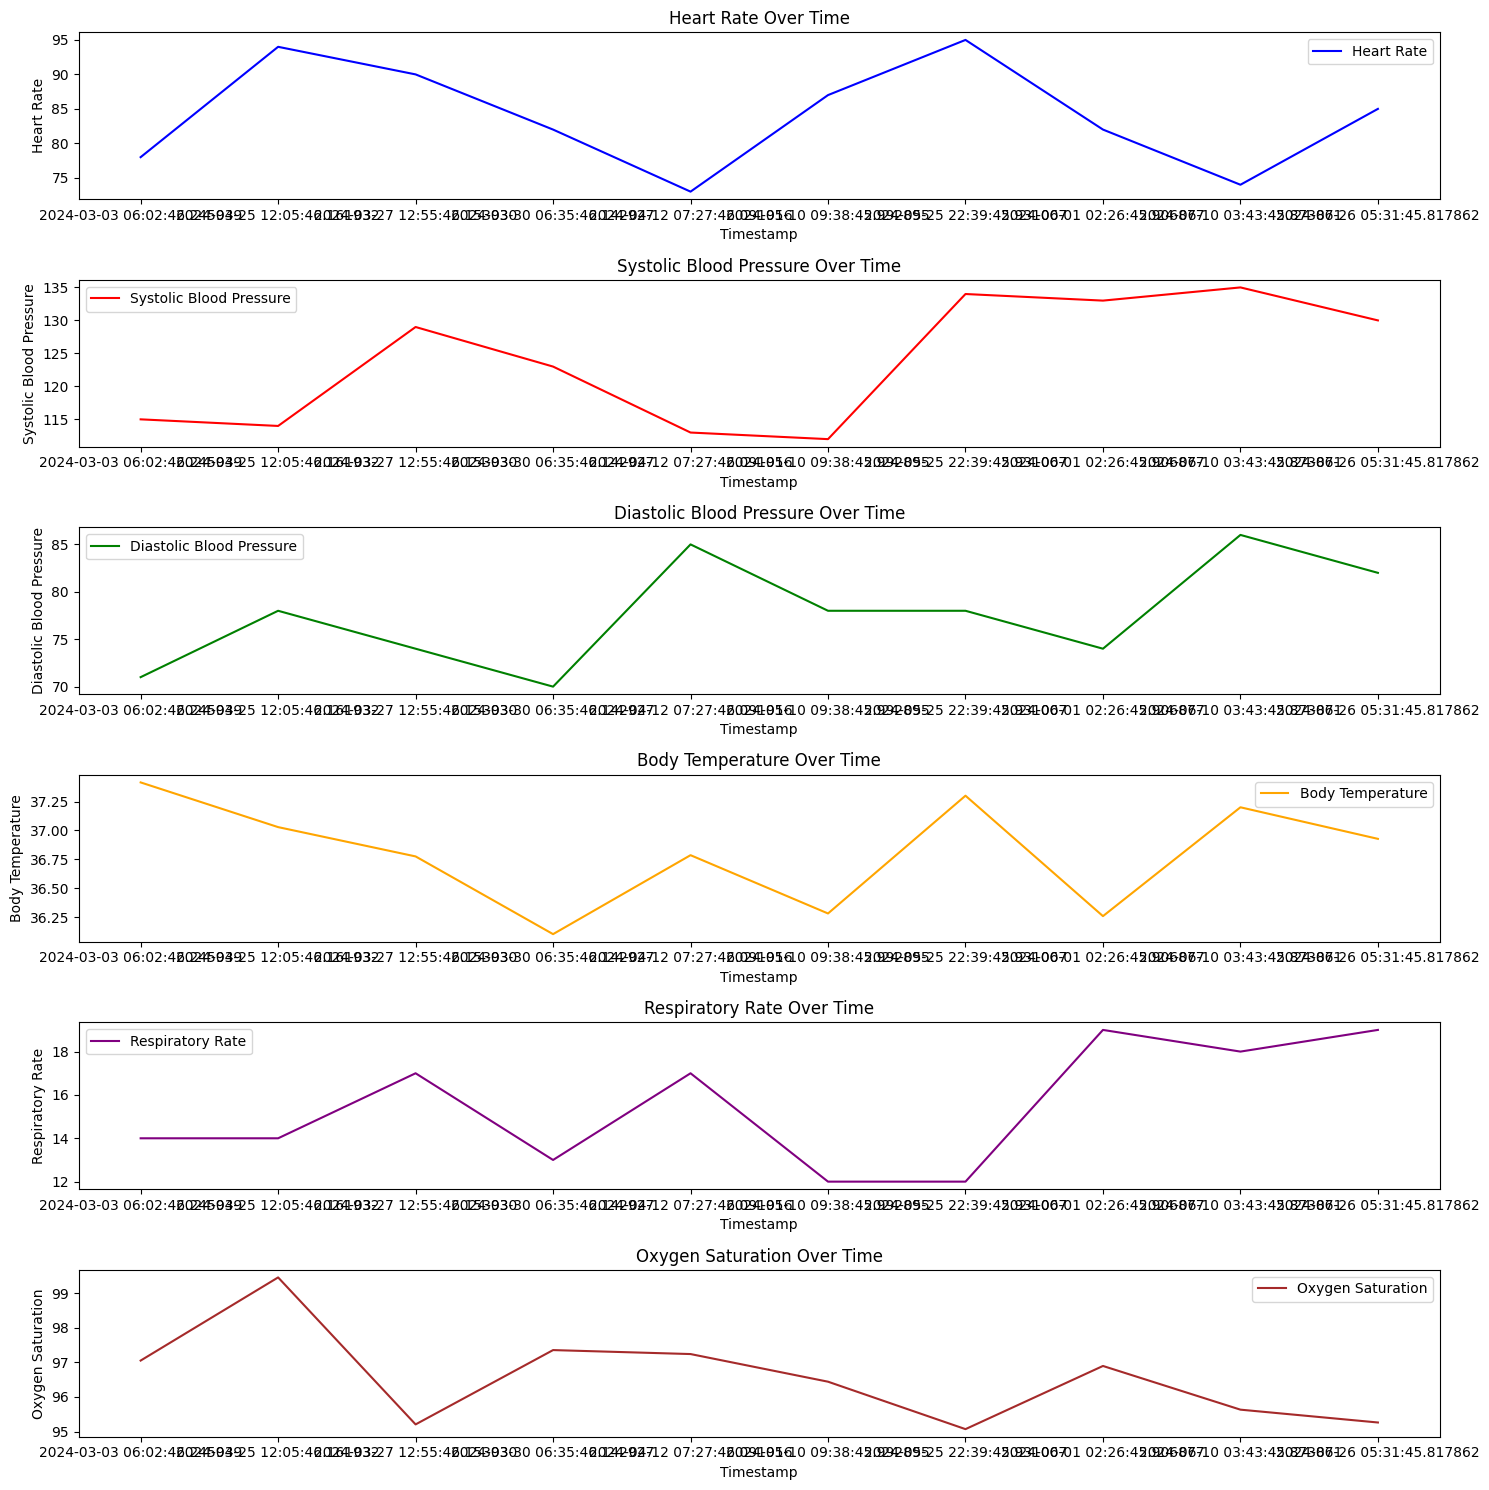

In [31]:
# Visualization (if Timestamp column is available)
if 'Timestamp' in data.columns:
    plt.figure(figsize=(15, 15))
    sample_data = data.sample(n=10, random_state=42)
    sample_data = sample_data.sort_values(by='Timestamp')

    # Plot Heart Rate over time
    plt.subplot(6, 1, 1)
    plt.plot(sample_data['Timestamp'], sample_data['Heart Rate'], label='Heart Rate', color='blue')
    plt.xlabel('Timestamp')
    plt.ylabel('Heart Rate')
    plt.title('Heart Rate Over Time')
    plt.legend()

    # Plot Systolic Blood Pressure over time
    plt.subplot(6, 1, 2)
    plt.plot(sample_data['Timestamp'], sample_data['Systolic Blood Pressure'], label='Systolic Blood Pressure', color='red')
    plt.xlabel('Timestamp')
    plt.ylabel('Systolic Blood Pressure')
    plt.title('Systolic Blood Pressure Over Time')
    plt.legend()

    # Plot Diastolic Blood Pressure over time
    plt.subplot(6, 1, 3)
    plt.plot(sample_data['Timestamp'], sample_data['Diastolic Blood Pressure'], label='Diastolic Blood Pressure', color='green')
    plt.xlabel('Timestamp')
    plt.ylabel('Diastolic Blood Pressure')
    plt.title('Diastolic Blood Pressure Over Time')
    plt.legend()

    # Plot Body Temperature over time
    plt.subplot(6, 1, 4)
    plt.plot(sample_data['Timestamp'], sample_data['Body Temperature'], label='Body Temperature', color='orange')
    plt.xlabel('Timestamp')
    plt.ylabel('Body Temperature')
    plt.title('Body Temperature Over Time')
    plt.legend()

    # Plot Respiratory Rater over time
    plt.subplot(6, 1, 5)
    plt.plot(sample_data['Timestamp'], sample_data['Respiratory Rate'], label='Respiratory Rate', color='purple')
    plt.xlabel('Timestamp')
    plt.ylabel('Respiratory Rate')
    plt.title('Respiratory Rate Over Time')
    plt.legend()

    # Plot Oxygen Saturation
    plt.subplot(6, 1, 6)
    plt.plot(sample_data['Timestamp'], sample_data['Oxygen Saturation'], label='Oxygen Saturation', color='brown')
    plt.xlabel('Timestamp')
    plt.ylabel('Oxygen Saturation')
    plt.title('Oxygen Saturation Over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("\nNote: No 'Timestamp' column found. Trends over time cannot be visualized.")